In [88]:
from sklearn.datasets import make_regression
import numpy as np
import math
import matplotlib.pyplot as plt


def costFunctionReg(X, y, w, l_lambda):
    m, n = y.shape
    f = 0
    prediction = np.dot(X, w)
    reg = (l_lambda / (2 * m)) * np.sum(np.square(w))
    f = float((1. / (2 * m)) * np.dot((prediction - y).T, (prediction - y))) + reg
    return f


def gradient_descent_ridge(X, y, w, learning_rate, l_lambda, iterations):
    m, n= y.shape
    cost_history = np.zeros(iterations)
    X = X / (np.linalg.norm(X, axis=0))
    y = y / (np.linalg.norm(y, axis=0))
    for i in range(iterations):
        # Predicted Y
        predicted = np.dot(X, w)

        # Gradient descent
        w = w - learning_rate * (1 / m) * (np.dot(X.T, (predicted - y)) + l_lambda * w)

        # Cost function
        cost_history[i] = costFunctionReg(X, y, w, l_lambda)

    return w, cost_history


def nesterov_gradient_descent_ridge(X, y, w, learning_rate, l_lambda, iterations):
    m, n= y.shape
    cost_history = np.zeros(iterations)
    
    X = X / (np.linalg.norm(X, axis=0))
    y = y / (np.linalg.norm(y, axis=0))

    lambda_current = 0      # lambda n
    lambda_old = 0          # lambda n-1
    lambda_new = 0          # lambda n+1
    for i in range(iterations):
        # Predicted Y
        predicted = np.dot(X, w)

        # Gradient descent
        w_n_1 = w - (learning_rate) * (1 / m) * (np.dot(X.T, (predicted - y)) + l_lambda * w) #w

        # Nesterov
        lambda_current =(1+math.sqrt(1+4*lambda_old**2))/2
        lambda_new = (1 + math.sqrt(1 + 4 * lambda_current ** 2)) / 2
        gamma = (1-lambda_current)/(lambda_new)

        # New values
        w = (1-gamma)*w_n_1+(gamma*w)

        # Cost function
        cost_history[i] = costFunctionReg(X, y, w, l_lambda)

        # Updating for new iteration
        lambda_old = lambda_current
        lambda_current = lambda_new

    return w, cost_history



def get_mini_batches(X, y, batch_size):
    random_idxs = np.random.choice(len(y), len(y), replace=False)
    X_shuffled = X[random_idxs, :]
    y_shuffled = y[random_idxs]

    mini_batches = [(X_shuffled[i:i + batch_size, :], y_shuffled[i:i + batch_size]) for i in range(0, len(y), batch_size)]

    return mini_batches



def min_batch_SGD_ridge(X, y, w, learning_rate, l_lambda, iterations, batch_size):
    m, n = y.shape
    cost_history = np.zeros(iterations)
    X = X / (np.linalg.norm(X, axis=0))
    y = y / (np.linalg.norm(y, axis=0))

    for i in range(iterations):
        mini_batches = get_mini_batches(X, y, batch_size)
        total_batches = len(mini_batches)
        cost = 0

        for selected_batch in range(total_batches):
            x_batch = mini_batches[selected_batch][0]
            y_batch = mini_batches[selected_batch][1]
            m_i,n_i=x_batch.shape

            # Predicted Y
            predicted = np.dot(x_batch, w)

            # Gradient descent
            w = w - learning_rate * (1/m_i) * (np.dot(x_batch.T, (predicted - y_batch)) + l_lambda * w)
            cost += costFunctionReg(x_batch, y_batch, w, l_lambda)

        # Cost function
        cost_history[i] = cost/total_batches
    return w, cost_history

########################################################################################
# Lasso
########################################################################################
def sigmoid(w):
  return 1 / (1 + np.exp(-w))

def costFunctionReg_Lasso(X, y, w, lambda_l):
    m,n = y.shape
    prediction = np.dot(X, w)
    reg = lambda_l * np.sum(sigmoid(w))
    f = (1/m) * np.dot( (prediction - y).T, (prediction - y)) + reg
    return f

#Lasso
def gradient_descent_lasso(X, y, w, learning_rate, l_lambda, iterations):
    m, n = y.shape
    cost_history = np.zeros(iterations)
    X = X / (np.linalg.norm(X, axis=0))
    y = y / (np.linalg.norm(y, axis=0))
    
    for i in range(iterations):

        # Predicted Y
        predicted = np.dot(X, w)
        error = predicted - y

        # Gradient descent
        w = w - learning_rate * (1/m)*(np.dot(X.T,error) + l_lambda * sigmoid(w))

        cost = costFunctionReg_Lasso(X,y,w,l_lambda)
        cost_history[i] = cost

    return w, cost_history



def nesterov_gradient_descent_lasso(X, y, w, learning_rate, l_lambda, iterations):
    m, n = y.shape
    cost_history = np.zeros(iterations)

    lambda_current = 0  # lambda n
    lambda_old = 0  # lambda n-1
    lambda_new = 0  # lambda n+1
    X = X / (np.linalg.norm(X, axis=0))
    y = y / (np.linalg.norm(y, axis=0))

    for i in range(iterations):
        # Predicted Y
        predicted = np.dot(X, w)
        error = predicted - y

        lambda_current = (1 + math.sqrt(1 + 4 * lambda_old ** 2)) / 2
        lambda_new = (1 + math.sqrt(1 + 4 * lambda_current ** 2)) / 2
        gamma = (1 - lambda_current) / lambda_new

        # Gradient descent
        w_n_1 = w - learning_rate * 1/m * (np.dot(X.T, error) + l_lambda * sigmoid(w))

        # New values
        w = (1 - gamma) * w_n_1 + (gamma * w)

        # Cost function
        cost =  costFunctionReg_Lasso(X,y,w,l_lambda)
        cost_history[i] = cost

        # Updating for new iteration
        lambda_old = lambda_current
        lambda_current = lambda_new

    return w, cost_history


def get_mini_batches(X, y, batch_size):
    random_idxs = np.random.choice(len(y), len(y), replace=False)
    X_shuffled = X[random_idxs, :]
    y_shuffled = y[random_idxs]

    mini_batches = [(X_shuffled[i:i + batch_size, :], y_shuffled[i:i + batch_size]) for i in range(0, len(y), batch_size)]

    return mini_batches


def min_batch_SGD_lasso(X, y, w, learning_rate, l_lambda, iterations, batch_size):
    m, n= y.shape
    cost_history = np.zeros(iterations)
    X = X / (np.linalg.norm(X, axis=0))
    y = y / (np.linalg.norm(y, axis=0))

    for i in range(iterations):
        mini_batches = get_mini_batches(X, y, batch_size)
        total_batches = len(mini_batches)
        cost = 0

        for selected_batch in range(total_batches):
            x_batch = mini_batches[selected_batch][0]
            y_batch = mini_batches[selected_batch][1]

            # Predicted Y
            predicted = np.dot(x_batch, w)
            error = predicted - y_batch

            # Gradient descent
            w = w - learning_rate * (np.dot(x_batch.T, error) + l_lambda * sigmoid(w))
            cost += costFunctionReg_Lasso(x_batch, y_batch, w, l_lambda)


        # Cost function
        cost_history[i] = cost/total_batches
    return w, cost_history

In [54]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [55]:
dataset = pd.read_csv('Data/weather.csv')
dataset.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(119040, 31)

In [56]:
dataset.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


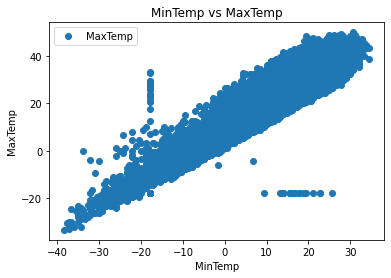

In [57]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

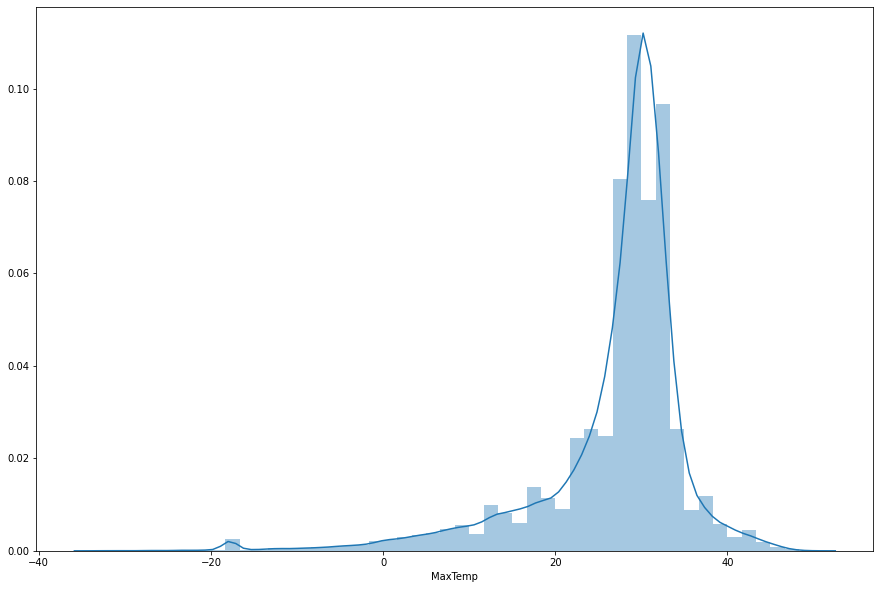

In [58]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [59]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train.shape

(59520, 1)

In [92]:
################### Wheather ######################
dataset = pd.read_csv('Data/weather.csv')
#print(dataset.shape)
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
learning_rate = 0.05        # Step size
iterations = 500000          # No. of iterations
lambda_l = 10

row,col=X_train.shape
initial_w= np.zeros((col,1))


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


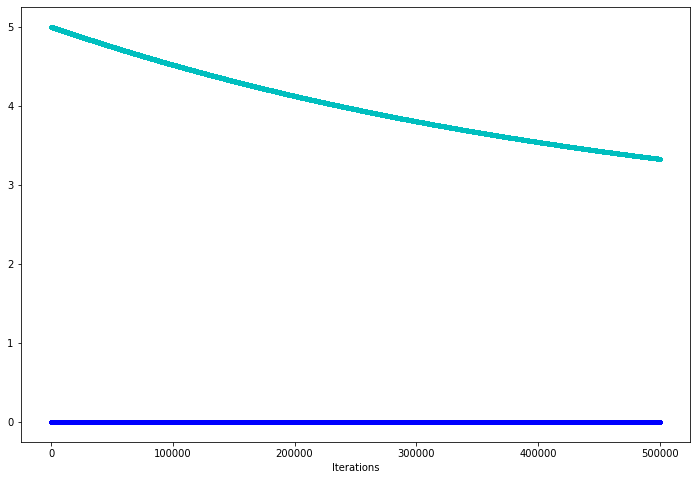

In [93]:
# Batch
theta , cost_history = gradient_descent_ridge(X_train,y_train,initial_w, learning_rate, lambda_l, iterations)
theta3, cost_history3 = gradient_descent_lasso(X_train,y_train,initial_w, learning_rate, 10, iterations)

fig,ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('Iterations')
ax.plot(range(iterations), cost_history ,'b.', label="Ridge - Batch")
ax.plot(range(iterations), cost_history3,'c.', label="LASSO - Batch")

In [94]:
# w Ridge
theta

array([[0.08381578]])

In [95]:
cost_history

array([5.25033077e-06, 5.25032551e-06, 5.25032025e-06, ...,
       4.79674356e-06, 4.79674355e-06, 4.79674353e-06])

In [96]:
# w Lasso
theta3

array([[-0.69559824]])

In [97]:
cost_history3

array([5.00000522, 4.99999994, 4.99999466, ..., 3.32792248, 3.32792055,
       3.32791862])

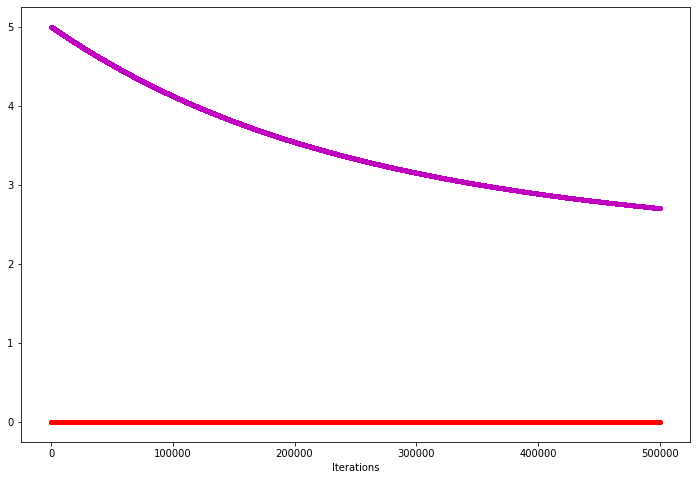

In [98]:
# Nesterov
theta1, cost_history1 = nesterov_gradient_descent_ridge(X_train,y_train,initial_w, learning_rate, lambda_l, iterations)
#theta2, cost_history2 = min_batch_SGD_ridge(X_train,y_train,initial_w, learning_rate, lambda_l, iterations, 2048)

theta4, cost_history4 = nesterov_gradient_descent_lasso(X_train,y_train,initial_w, learning_rate, lambda_l, iterations)
#theta5, cost_history5 = min_batch_SGD_lasso(X_train,y_train,initial_w, learning_rate, lambda_l, iterations, 2048)

fig,ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('Iterations')
ax.plot(range(iterations), cost_history1,'r.',label="Ridge- Nesterov")
ax.plot(range(iterations), cost_history4,'m.',label="LASSO- Nesterov")
plt.show()

In [99]:
# w Ridge
theta1

array([[0.08848465]])

In [100]:
cost_history1

array([5.25033077e-06, 5.25032403e-06, 5.25031649e-06, ...,
       4.79533604e-06, 4.79533604e-06, 4.79533604e-06])

In [101]:
# w Lasso
theta4

array([[-0.99196064]])

In [102]:
cost_history4

array([5.00000522, 4.99999845, 4.99999088, ..., 2.70529411, 2.70529258,
       2.70529105])

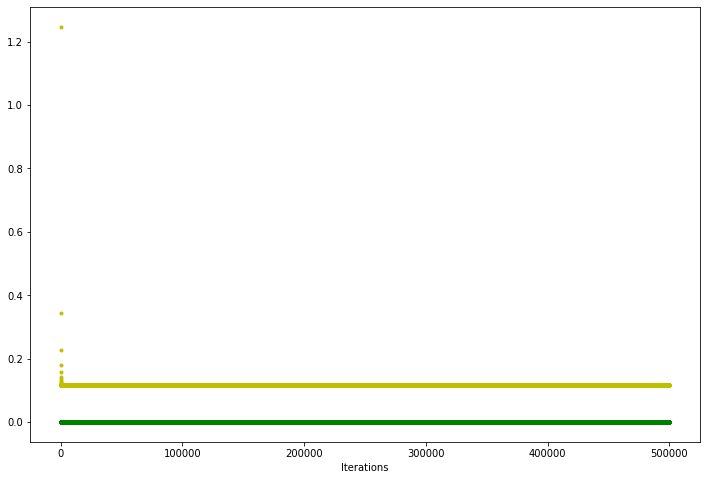

In [103]:
# Min Batch
theta2, cost_history2 = min_batch_SGD_ridge(X_train,y_train,initial_w, learning_rate, lambda_l, iterations, 2048)

theta5, cost_history5 = min_batch_SGD_lasso(X_train,y_train,initial_w, learning_rate, lambda_l, iterations, 2048)

fig,ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('Iterations')
ax.plot(range(iterations), cost_history2,'g.',label="Ridge- Mini Batch")
ax.plot(range(iterations), cost_history5,'y.',label="LASSO- Mini Batch")
plt.show()

In [104]:
# Ridge
theta2

array([[0.0020514]])

In [107]:
cost_history2

array([5.25052312e-06, 5.25160728e-06, 5.24969713e-06, ...,
       5.24038929e-06, 5.23957568e-06, 5.23975961e-06])

In [105]:
# Lasso
theta5

array([[-4.45140869]])

In [106]:
cost_history5

array([1.24708067, 0.34317822, 0.22638308, ..., 0.11576914, 0.11576709,
       0.11576759])

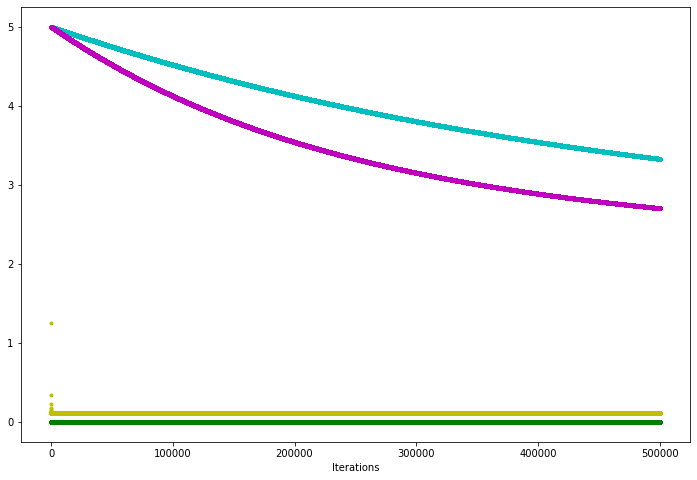

In [108]:
# All
fig,ax = plt.subplots(figsize=(12,8))
#ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')

ax.plot(range(iterations), cost_history ,'b.')
ax.plot(range(iterations), cost_history3,'c.')
ax.plot(range(iterations), cost_history1,'r.',label="Ridge- Nesterov")
ax.plot(range(iterations), cost_history4,'m.',label="LASSO- Nesterov")
ax.plot(range(iterations), cost_history2,'g.',label="Ridge- Mini Batch")
ax.plot(range(iterations), cost_history5,'y.',label="LASSO- Mini Batch")
#ax.plot(range(iterations), cost_history2,'g.')
plt.show()

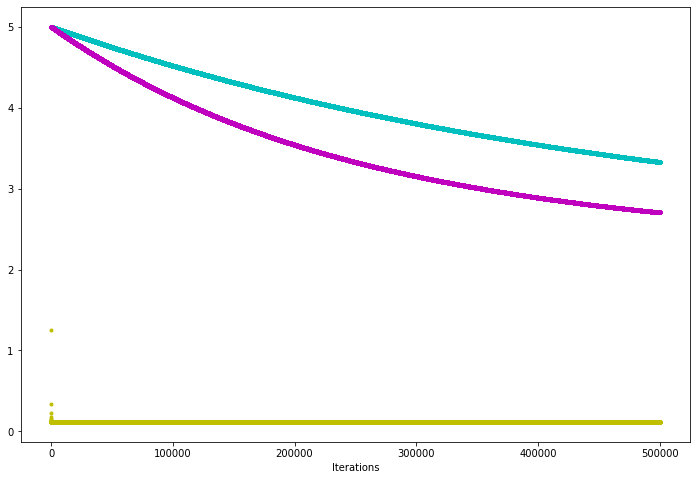

In [109]:
#Lasso
fig,ax = plt.subplots(figsize=(12,8))
#ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')

#ax.plot(range(iterations), cost_history ,'b.',label="Ridge- Batch")
ax.plot(range(iterations), cost_history3,'c.',label="LASSO- Batch")
#ax.plot(range(iterations), cost_history1,'r.',label="Ridge- Nesterov")
ax.plot(range(iterations), cost_history4,'m.',label="LASSO- Nesterov")
#ax.plot(range(iterations), cost_history2,'g.',label="Ridge- Mini Batch")
ax.plot(range(iterations), cost_history5,'y.',label="LASSO- Mini Batch")
#ax.plot(range(iterations), cost_history2,'g.')
plt.show()

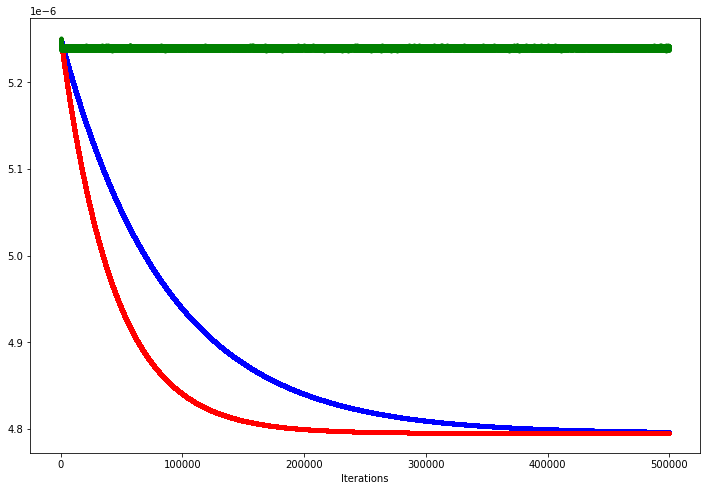

In [110]:
# Ridge
fig,ax = plt.subplots(figsize=(12,8))
#ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')

ax.plot(range(iterations), cost_history ,'b.',label="Ridge- Batch")
#ax.plot(range(iterations), cost_history3,'c.',label="LASSO- Batch")
ax.plot(range(iterations), cost_history1,'r.',label="Ridge- Nesterov")
#ax.plot(range(iterations), cost_history4,'m.',label="LASSO- Nesterov")
ax.plot(range(iterations), cost_history2,'g.',label="Ridge- Mini Batch")
#ax.plot(range(iterations), cost_history5,'y.',label="LASSO- Mini Batch")
#ax.plot(range(iterations), cost_history2,'g.')
plt.show()